# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import cufflinks as cf

import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 

from plotly import tools 


#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 16,8

# Importing the Dataset

In [2]:
df_loan = pd.read_csv("../Data/Original Data/loan-og.csv",encoding='utf-8',header=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# Looking at the Data

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [4]:
# Column Names

print(df_loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
# Unique Values

print(df_loan.shape)
print(df_loan.isnull().sum().value_counts())

(887379, 74)
0         34
866007    12
29         7
70276      3
886868     2
152        1
4          1
502        1
51462      1
761351     1
866569     1
145        1
44825      1
886870     1
868762     1
750326     1
454312     1
252971     1
53         1
665676     1
17659      1
dtype: int64


# Distribution of Loan Amount

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



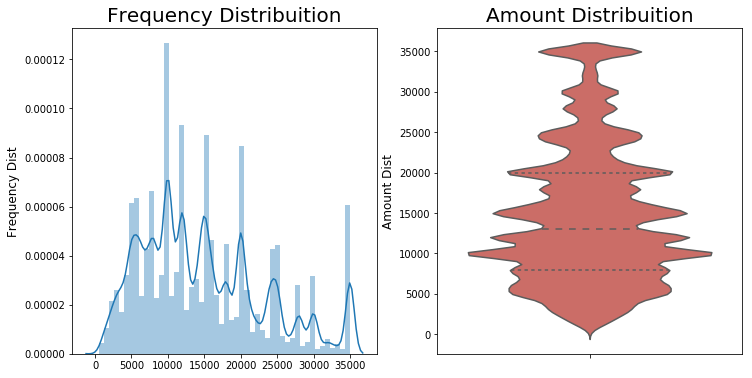

In [6]:
#I will start looking the loan_amnt column
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(df_loan["loan_amnt"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="loan_amnt", data=df_loan, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

# Distribution of Interest Rate

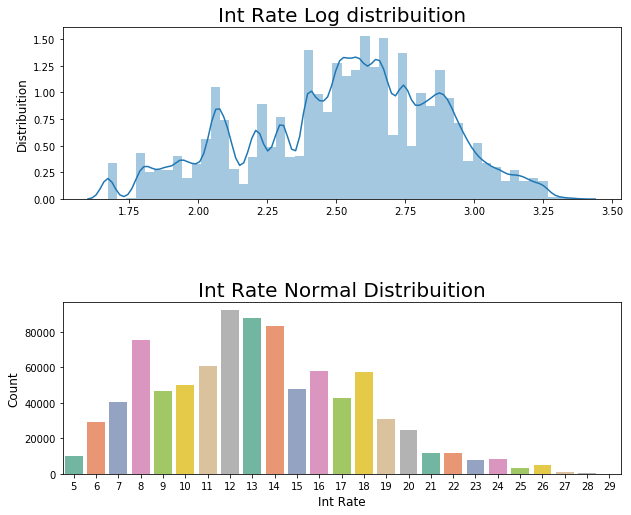

In [7]:
df_loan['int_round'] = df_loan['int_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

#Exploring the Int_rate
plt.subplot(211)
g = sns.distplot(np.log(df_loan["int_rate"]))
g.set_xlabel("", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Int Rate Log distribuition", fontsize=20)

plt.subplot(212)
g1 = sns.countplot(x="int_round",data=df_loan, 
                   palette="Set2")
g1.set_xlabel("Int Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Int Rate Normal Distribuition", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()

# Distribution of Loan Status

In [8]:
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'NMCP Fully Paid'
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'NMCP Charged Off'

Current               601779
Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
NMCP Fully Paid         1988
Default                 1219
NMCP Charged Off         761
Name: loan_status, dtype: int64


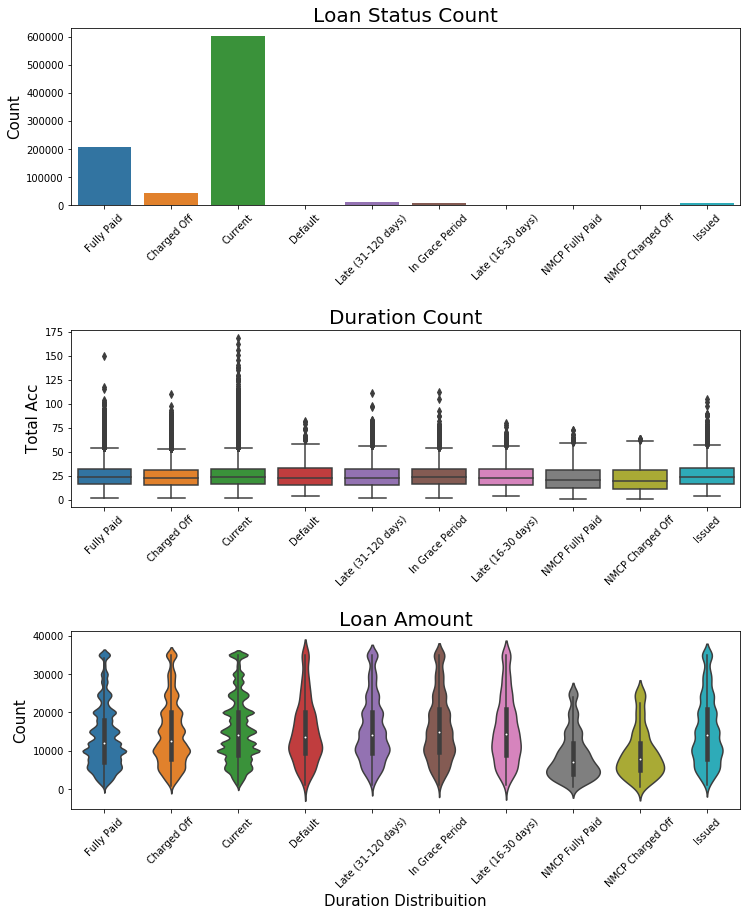

In [9]:
print(df_loan.loan_status.value_counts())

plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df_loan)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

plt.subplot(312)
g1 = sns.boxplot(x="loan_status", y="total_acc", data=df_loan)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Total Acc", fontsize=15)
g1.set_title("Duration Count", fontsize=20)

plt.subplot(313)
g2 = sns.violinplot(x="loan_status", y="loan_amnt", data=df_loan)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Duration Distribuition", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Loan Amount", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()

# Distribution of Issue Date

In [10]:
df_loan['issue_month'], df_loan['issue_year'] = df_loan['issue_d'].str.split('-', 1).str

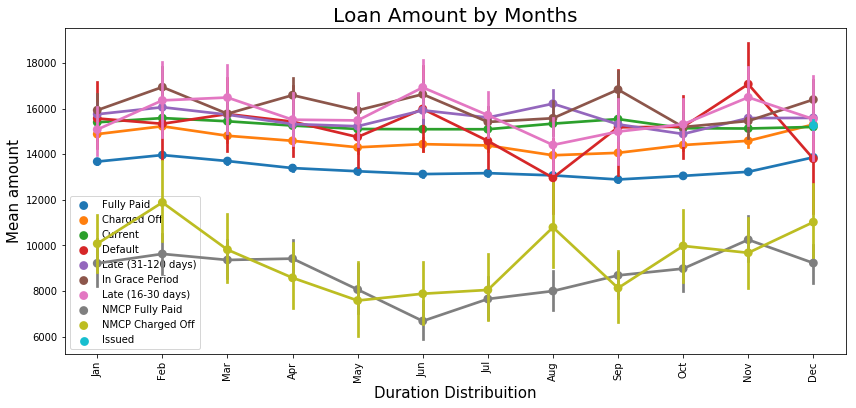

In [11]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_loan['issue_month'] = pd.Categorical(df_loan['issue_month'],categories=months_order, ordered=True)

#Issue_d x loan_amount
plt.figure(figsize = (14,6))

g = sns.pointplot(x='issue_month', y='loan_amnt', 
                  data=df_loan, 
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()

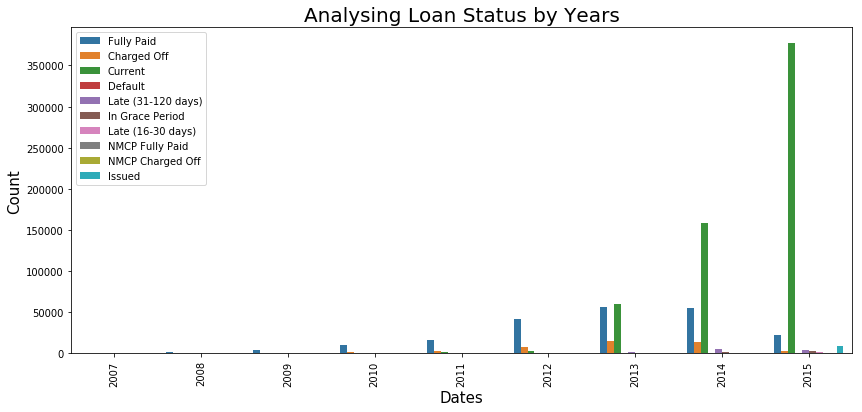

In [12]:
# Analysing Loan by Years

plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=df_loan,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

No handles with labels found to put in legend.


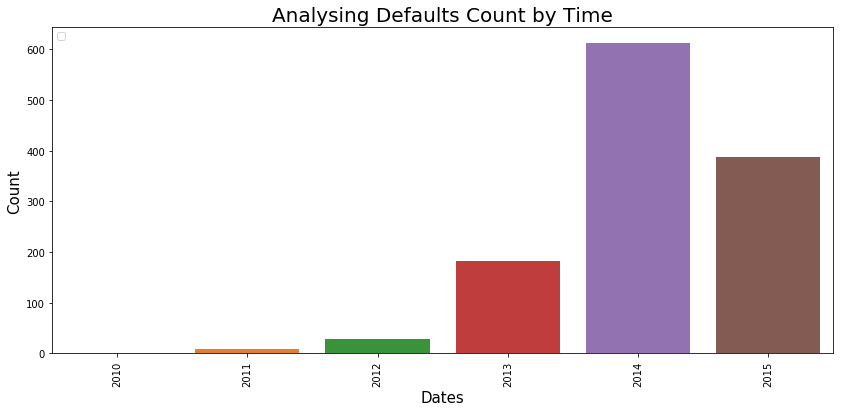

In [35]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=df_loan[df_loan['loan_status'] =='Default'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Defaults Count by Time", fontsize=20)
plt.show()

# Lets Generate a Crosstab using Heatmap

In [13]:
#Exploring the loan_status x purpose
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[purp_loan[0]], df_loan[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days),NMCP Charged Off,NMCP Fully Paid
purpose,,,,,,,,,,
car,448,4937,10,3198,40,81,15,70,13,51
credit_card,7826,149835,233,42250,1150,2071,381,2096,69,271
debt_consolidation,27599,356239,790,120764,3998,4796,1510,7419,292,808
educational,56,1,0,269,0,0,0,0,32,65
home_improvement,2269,34980,47,12660,367,493,137,662,71,143
house,286,1854,7,1366,37,37,15,61,11,33
major_purchase,874,10308,14,5391,125,184,51,207,23,100
medical,569,5324,15,2285,56,91,17,125,22,36
moving,425,3121,11,1603,43,52,23,90,15,31


In [14]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_grade[0]], df_loan[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,2617,9519,12642,10486,6258,2934,792
Current,103322,171735,171175,91984,47061,13589,2913
Default,47,198,360,312,201,79,22
Fully Paid,39679,66546,52678,30020,12928,4726,1146
In Grace Period,365,1240,1887,1405,908,354,94
Issued,1448,2529,2472,1185,593,194,39
Late (16-30 days),134,410,678,569,368,155,43
Late (31-120 days),492,2004,3339,2890,1852,768,246
NMCP Charged Off,8,85,148,197,158,93,72


In [15]:
loan_home = ['loan_status', 'home_ownership']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_home[0]], df_loan[loan_home[1]]).style.background_gradient(cmap = cm)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0,19878,7,27,4025,21311
Current,2,303764,2,3,62041,235967
Default,0,498,0,0,110,611
Fully Paid,1,104966,36,114,17960,84646
In Grace Period,0,2855,0,0,637,2761
Issued,0,4220,0,0,1038,3202
Late (16-30 days),0,1101,0,0,260,996
Late (31-120 days),0,5019,0,0,1212,5360
NMCP Charged Off,0,348,1,11,49,352


In [16]:
#Looking the 'verification_status' column that is the Indicates 
#if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
loan_verification = ['loan_status', 'verification_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_verification[0]], df_loan[loan_verification[1]]).style.background_gradient(cmap = cm)

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,12208,13740,19300
Current,171400,243705,186674
Default,278,462,479
Fully Paid,73856,60271,73596
In Grace Period,1403,2523,2327
Issued,2779,2836,2845
Late (16-30 days),473,1006,878
Late (31-120 days),2521,4725,4345
NMCP Charged Off,511,82,168


# Understanding the Installment Column

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



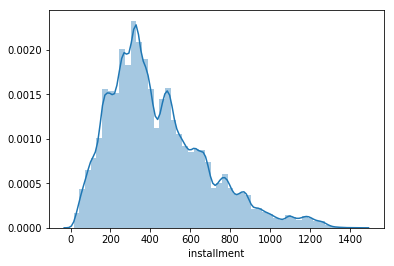

In [17]:
sns.distplot(df_loan['installment'])
plt.show()

# Lookin up Home Ownership by Loan Amount

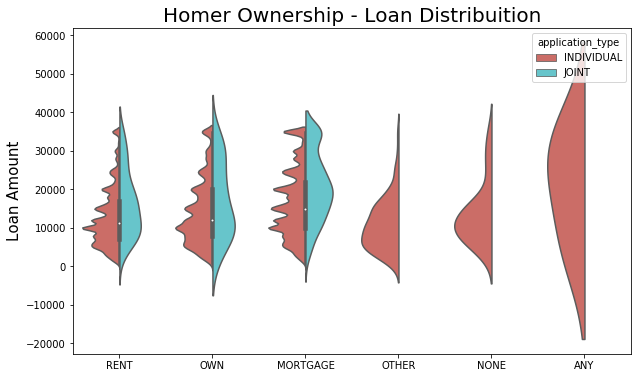

In [18]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="home_ownership",y="loan_amnt",data=df_loan,
               kind="violin",
               split=True,palette="hls",
               hue="application_type")
g.set_title("Homer Ownership - Loan Distribuition", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.show()

# Distribution of Purpose

Purposes count description: 
application_type    INDIVIDUAL  JOINT
purpose                              
car                       8862      1
credit_card             206067    115
debt_consolidation      523881    334
educational                423      0
home_improvement         51803     26
house                     3707      0
major_purchase           17275      2
medical                   8538      2
moving                    5413      1
other                    42867     27
renewable_energy           575      0
small_business           10375      2
vacation                  4735      1
wedding                   2347      0


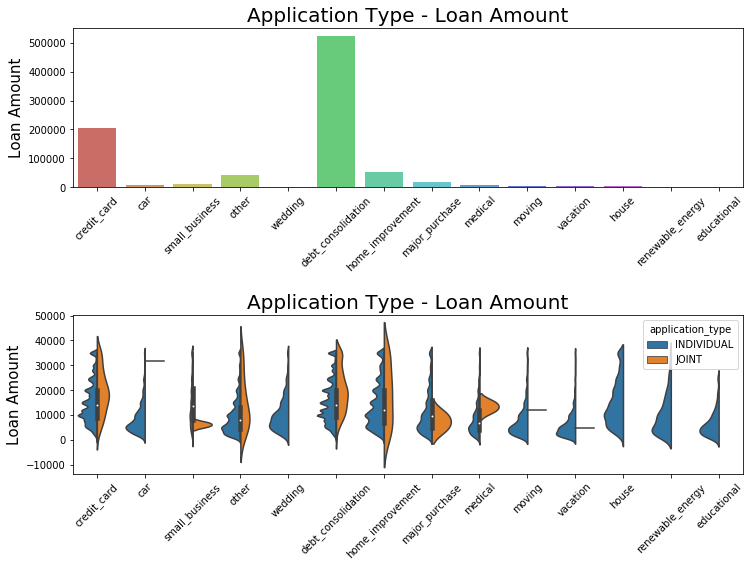

In [19]:
# Now will start exploring the Purpose variable
print("Purposes count description: ")
print(pd.crosstab(df_loan.purpose, df_loan.application_type))

plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.countplot(x="purpose",data=df_loan,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type - Loan Amount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="purpose",y="loan_amnt",data=df_loan,
               hue="application_type", split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Application Type - Loan Amount", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Loan Amount", fontsize=15)

plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)
plt.show()

# Looking at Grades

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2612: UserWarning:

The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 



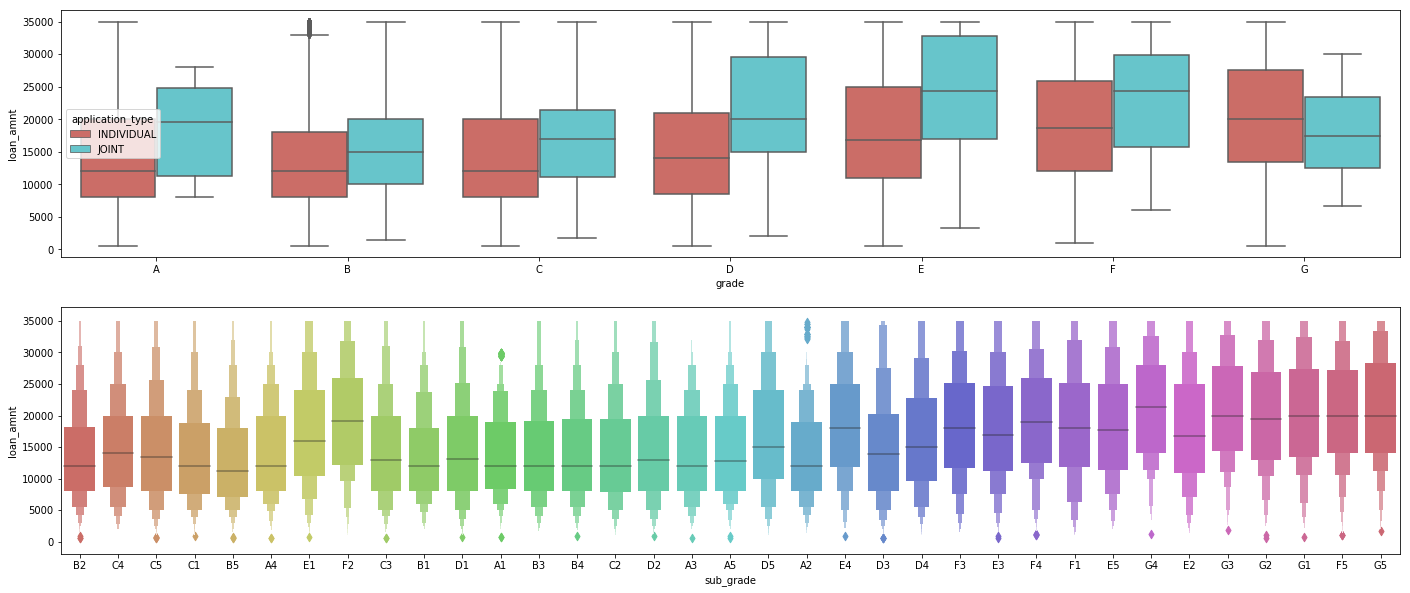

In [36]:
fig, ax = plt.subplots(2,1, figsize=(24,10))
sns.boxplot(x="grade", y="loan_amnt", data=df_loan,
            palette="hls",ax=ax[0], hue="application_type", 
            order=["A",'B','C','D','E','F', 'G'])

sns.lvplot(x="sub_grade", y="loan_amnt",data=df_loan, 
               palette="hls", ax=ax[1])

plt.show()

# Heatmap of Address State vs Loan Status

In [33]:
#Exploring the State Adress x Loan Status
adress_loan = ['addr_state', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[adress_loan[0]], df_loan[adress_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days),NMCP Charged Off,NMCP Fully Paid
addr_state,,,,,,,,,,
AK,96,1469,2,567,15,14,6,31,1,4
AL,662,7576,9,2485,111,122,43,160,8,24
AR,337,4637,8,1417,57,70,13,86,6,9
AZ,1049,13577,39,5028,143,193,50,282,18,33
CA,7332,81851,211,35778,906,1147,327,1641,101,223
CO,784,12573,25,4829,106,166,57,202,13,52
CT,614,9353,8,3067,126,139,29,133,12,50
DC,87,1543,2,750,10,13,0,17,2,8
DE,121,1730,5,546,21,28,7,31,4,18


# Looking at The Missing Values

Text(0, 0.5, '% missing data')

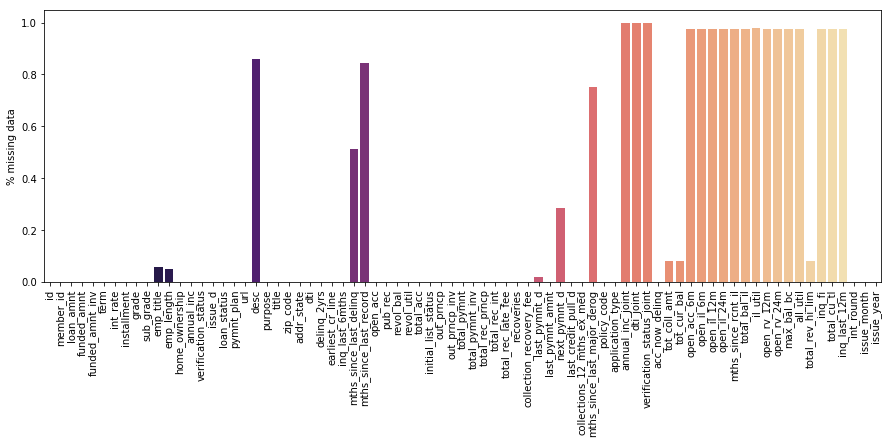

In [39]:
null_perc = df_loan.isnull().sum()/df_loan.isnull().count()

plt.figure(figsize=(15,5))

sns.barplot(x = np.arange(len(null_perc)), y =null_perc, palette="magma")

plt.xticks(np.arange(len(null_perc)),null_perc.index,rotation=90)
plt.ylabel('% missing data')

# Correlation

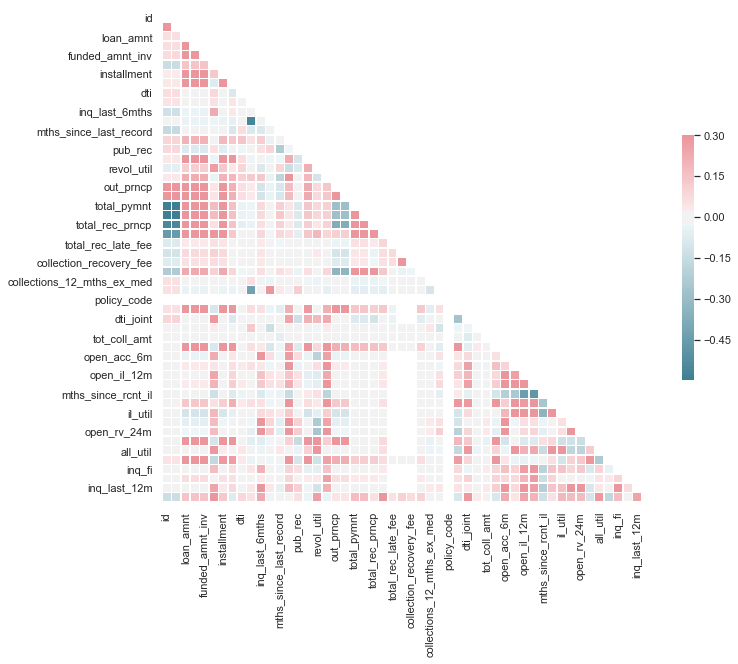

In [40]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df_loan.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})